# Machine Learning Project : Predicting success of a movie 


> ## Description: 
>In the contemporary era, the film industry continues to evolve rapidly, investing increasingly vast resources into production and marketing. However, despite these >advancements, predicting the commercial success of a feature film remains a complex challenge fraught with financial risk.

>This project aims to bridge that gap by leveraging the power of Machine Learning. By analyzing historical data—such as budget, casting, genre, and release timing—we aim to >build a predictive model capable of forecasting a movie's success. This tool seeks to provide data-driven insights to mitigate risks and optimize decision-making within >the entertainment sector.

## Data Importation 

In [4]:
import pandas as pd

First, we import the csv containing films metadata 

In [6]:
raw_data = pd.read_csv(r"movies_metadata.csv") # replace with your own path

C:\Users\Kenza\AppData\Local\Temp\ipykernel_13572\2876609785.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(r"movies_metadata.csv") # replace with your own path


In [7]:
raw_data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [8]:
raw_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Raw Data Overview

Here, we display the first few rows, the column names and teh dataset infos to perform an initial visual inspection of the dataset. This step helps us identify key structural characteristics:

> Data Format: We can observe that columns like genres and belongs_to_collection contain complex nested structures (dictionaries/JSON) that will need parsing.

> Missing Values: NaNs are already visible in columns such as homepage or belongs_to_collection.

> Variable Types: A mix of numerical (budget) and categorical data (original_language) is present.

### Preliminary Data Cleaning

We start by cleaning the raw dataset to keep only usable samples. We drop duplicates and deal with unknown values  (NaN or 0). This reduces the dataset size but ensures that every remaining entry is valid for training.

In [13]:
# removing duplicates 
print (f"raw_data shape before removing duplicates : {raw_data.shape}")
raw_data = raw_data.drop_duplicates()
print(f"raw_data shape after : {raw_data.shape}")

raw_data shape before removing duplicates : (45466, 24)
raw_data shape after : (45453, 24)


In [14]:
# Missing values 
print("Missing values per columns :")
raw_data.isna().sum()

Missing values per columns :


adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Since there are lots of missing values in thoses columns or the column is not petinent to the study, the best is to remove them from the dataset :

In [16]:
raw_data = raw_data.drop(columns= ["belongs_to_collection", "homepage", "tagline", "poster_path", "overview"])

In [17]:
cols_to_check = ["runtime", "imdb_id", "original_language", "popularity", "production_companies", "production_countries", 
                 "release_date", "revenue", "runtime", "spoken_languages", "status", "title", "video", "vote_average", "vote_count"]
raw_data = raw_data.dropna(subset=cols_to_check)

# verification 
raw_data.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

Now that we heve deal with the missing values we have to check the O values in numerical columns


In [19]:
# Count nb of 0
zeros_count = (raw_data == 0).sum()

# print only columns with 0 
zeros_count = zeros_count[zeros_count > 0]

print("Nb of 0 per columns :")
print(zeros_count)

Nb of 0 per columns :
popularity         19
revenue         37620
runtime          1514
video           44930
vote_average     2823
vote_count       2725
dtype: int64


### Data Cleaning: Removing Financials & Missing Metadata

Since our focus is about critical success, we remove financial columns (revenue) which contained a high percentage of missing values (zeros).

We also drop technical columns irrelevant to quality prediction (video) and remove the few rows with missing essential metadata like runtime, poularity, vote_average, vot_count.

In [21]:
# 1. Drop financial and technical columns
cols_to_drop = ["revenue", "video"]
raw_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [22]:
# 2. Drop rows with unintegrity values 

# Conversion of popularity to numeric
raw_data['popularity'] = pd.to_numeric(raw_data['popularity'], errors='coerce')

mask = (raw_data["popularity"]>0) & (raw_data["runtime"]>0) & (raw_data["vote_count"] >0)
raw_data = raw_data[mask]

### Data Enrichment: Merging Cast and Crew

To improve the predictive power of our model, we are enriching the dataset with information regarding the movie's Cast (actors) and Crew (directors, producers, writers).

This data is stored in a separate CSV file. We will merge it with our main dataset using the unique id of each movie as the key. This will allow us to analyze whether "Star Power" or specific directors correlate with box-office success.

However, the raw data for Cast and Crew is stored in complex JSON objects within a separate file (`credits.csv`).
To make this data usable for our Machine Learning models, we need to:
>  **Merge** the credits dataset with our main dataframe using the movie `id`.
>  **Parse** the JSON columns to extract specific names.
>  **Apply a Strategy:** Instead of listing every single actor (which would create thousands of variables and "noise"), we will follow a **"Top Billing" strategy**: we extract only the **first actor** (Lead) and the **Director**.

In [26]:
import ast
import numpy as np
import pandas as pd

# Try to load the credits data (adjust filename if necessary)
try:
    credits = pd.read_csv("credits.csv")
    print("Loaded credits.csv successfully.")
except FileNotFoundError:
    print("credits.csv not found; check the filename.")
    credits = pd.DataFrame()  # empty fallback
movies = raw_data
# Ensure the ID column is numeric in both datasets
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)

credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
credits = credits.dropna(subset=['id'])
credits['id'] = credits['id'].astype(int)

# Merge the datasets on the id column
df_enriched = movies.merge(credits, on='id', how='left')

print(f"Before merge: {movies.shape}")
print(f"After merge: {df_enriched.shape}")

# Helper to get the first actor's name from the cast list
def get_lead_actor(cast):
    try:
        items = ast.literal_eval(cast) if isinstance(cast, str) else cast
        if isinstance(items, list) and items:
            return items[0].get('name')
    except Exception:
        pass
    return np.nan

# Helper to get the director's name from the crew list
def get_director(crew):
    try:
        items = ast.literal_eval(crew) if isinstance(crew, str) else crew
        if isinstance(items, list):
            for member in items:
                if member.get('job') == 'Director':
                    return member.get('name')
    except Exception:
        pass
    return np.nan

print("Extracting lead actor and director…")
df_enriched['lead_actor'] = df_enriched['cast'].apply(get_lead_actor)
df_enriched['director'] = df_enriched['crew'].apply(get_director)

print("\nFirst rows with new columns:")
print(df_enriched[['title', 'lead_actor', 'director']].head())


Loaded credits.csv successfully.
Before merge: (41103, 17)
After merge: (41157, 19)
Extracting lead actor and director…

First rows with new columns:
                         title       lead_actor         director
0                    Toy Story        Tom Hanks    John Lasseter
1                      Jumanji   Robin Williams     Joe Johnston
2             Grumpier Old Men   Walter Matthau    Howard Deutch
3            Waiting to Exhale  Whitney Houston  Forest Whitaker
4  Father of the Bride Part II     Steve Martin    Charles Shyer


We use the **historical average** of the `vote_average` column.
* **Example:** If Tom Hanks appears in 10 movies in our dataset, we take the average rating of these 10 movies.
* **Result:** This gives us a numerical value representing the actor's "track record" or consistency in choosing good projects.

In [38]:
import ast

# 1. Function to get the genre from the JSON list
def get_main_genre(x):
    try:
        if isinstance(x, str):
            x = ast.literal_eval(x)
        if isinstance(x, list) and len(x) > 0:
            return x[0]['name']
        return np.nan
    except:
        return np.nan

print("Extracting main genre and dates...")

# 2. Creating the missing columns
df_enriched['main_genre'] = df_enriched['genres'].apply(get_main_genre)

# 3. Converting the date column to get Month and Year
df_enriched['release_date'] = pd.to_datetime(df_enriched['release_date'], errors='coerce')
df_enriched['month'] = df_enriched['release_date'].dt.month
df_enriched['year'] = df_enriched['release_date'].dt.year

# 4. Important: Remove rows where we don't have this info
# (The model cannot work if there are NaNs in these columns)
df_enriched = df_enriched.dropna(subset=['main_genre', 'month', 'year', 'runtime', 'popularity'])

print("Missing columns created!")
print(df_enriched[['title', 'main_genre', 'year', 'month']].head())

Extracting main genre and dates...
Missing columns created!
                         title main_genre  year  month
0                    Toy Story  Animation  1995     10
1                      Jumanji  Adventure  1995     12
2             Grumpier Old Men    Romance  1995     12
3            Waiting to Exhale     Comedy  1995     12
4  Father of the Bride Part II     Comedy  1995      2


### Modeling Strategy

To answer our problem *"Find the secret formula for a movie that works every time"*, we believe we need to analyze several key points:

>  **The "Star Power" Impact:** Does having a famous Lead Actor or Director guarantee a high rating?

>  **The Context:** Does the release month or the movie length (runtime) play a significant role?

>  **The Genre:** Are some genres naturally more appreciated than others?

To analyze these points simultaneously and objectively, we cannot just look at graphs. We need a Global Model that considers all these factors together.

In [54]:
# 1. Calculate Reputation Scores (Average of past ratings)
# We look at the history of the Lead Actor and Director
actor_scores = df_enriched.groupby('lead_actor')['vote_average'].mean()
director_scores = df_enriched.groupby('director')['vote_average'].mean()

# 2. Add these scores to our dataframe
# We replace names with their "Star Power" score
df_enriched['actor_score'] = df_enriched['lead_actor'].map(actor_scores)
df_enriched['director_score'] = df_enriched['director'].map(director_scores)

# Fill missing values (if an actor is new or unknown, we give them the global average)
global_mean = df_enriched['vote_average'].mean()
df_enriched['actor_score'] = df_enriched['actor_score'].fillna(global_mean)
df_enriched['director_score'] = df_enriched['director_score'].fillna(global_mean)

# 3. Create df_model (Convert Genre to numbers)
# We use One-Hot Encoding to turn "Action", "Comedy" into 0 and 1
df_model = pd.get_dummies(df_enriched, columns=['main_genre'], drop_first=True)

# 4. Define the list of ingredients (features) for the Model
features = ['runtime', 'popularity', 'month', 'year', 'actor_score', 'director_score']
# Automatically add all the new Genre columns we just created
features += [col for col in df_model.columns if 'main_genre_' in col]

print("Encoding finished.")
print(f"Variable 'df_model' created successfully.")
print(f"List 'features' is ready with {len(features)} elements.")

C:\Users\Kenza\AppData\Local\Temp\ipykernel_13572\2986400401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched['actor_score'] = df_enriched['lead_actor'].map(actor_scores)
C:\Users\Kenza\AppData\Local\Temp\ipykernel_13572\2986400401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched['director_score'] = df_enriched['director'].map(director_scores)
C:\Users\Kenza\AppData\Local\Temp\ipykernel_13572\2986400401.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Encoding finished.
Variable 'df_model' created successfully.
List 'features' is ready with 25 elements.


## Does having a famous Lead Actor or Director guarantee a high rating?

For this analysis, since we are dealing with complex data that includes both numerical values (Runtime, Year) and encoded scores (Actor Reputation), it is simpler and more effective to apply a **Random Forest Regressor**.

> It is less sensitive to outliers than a simple Linear Regression.

> It provides a "Feature Importance" metric, which allows us to directly visualize our "Secret Formula".

Training the Random Forest model...
--- Model Performance ---
R2 Score: 0.717 (We explain 71.7% of the variations)
RMSE: 0.659 (Average error in points)


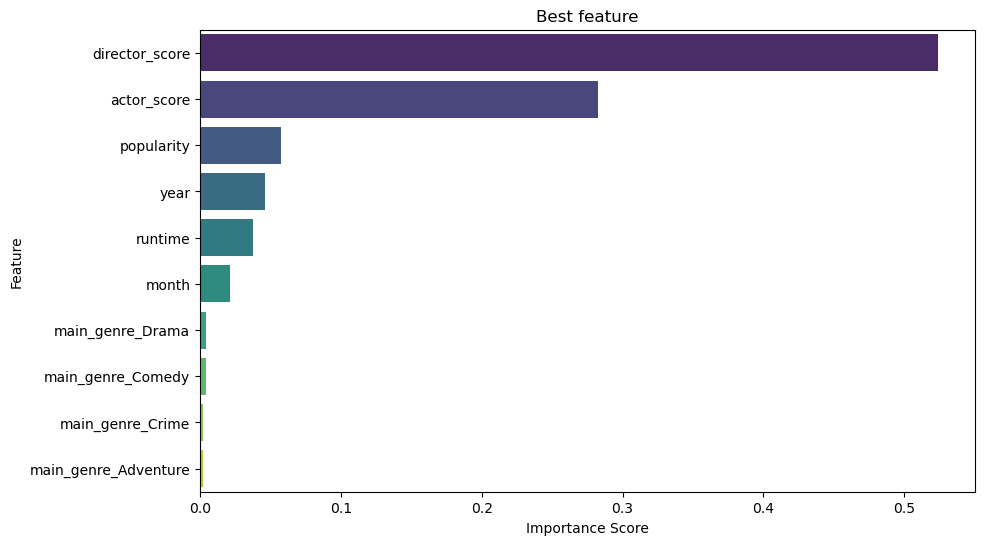

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# We use the features we defined in the previous step
X = df_model[features]
y = df_model['vote_average']

# 2. Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Application
# We use 100 trees to get a stable result
print("Training the Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Prediction
y_pred = rf_model.predict(X_test)

# 5. Performance Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"--- Model Performance ---")
print(f"R2 Score: {r2:.3f} (We explain {r2*100:.1f}% of the variations)")
print(f"RMSE: {rmse:.3f} (Average error in points)")

# 6. Plotting Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Best feature')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Analysis of Results

We evaluate the model using the R2 Score (precision) and the RMSE (margin of error).

> **R2 Score (0.717):** Our model performs impressively well. We can explain **71.7%** of the variations in movie ratings. In the context of predicting art and human taste—which are subjective—this is a strong result.

> **RMSE (0.659):** On average, our prediction is off by only **0.6 points** on a scale of 10.

#### Feature Importance

The graph  reveals the hierarchy of success factors used by our model:

> **The Director is King:** The `director_score` is by far the most dominant feature (importance > 0.5). This confirms the "Auteur Theory": the quality of a movie depends primarily on the vision of the person directing it.

> **Star Power helps:** The `actor_score` is the second most important factor (~0.28). A famous cast helps secure a good rating, but it is half as significant as the director.

> **Context is minor:** Factors like `year`, `runtime`, or `popularity` have a very small impact compared to the human talent.

> **Genre doesn't matter:** Surprisingly, the specific genre (Comedy, Drama, etc.) has almost **zero impact** on the quality prediction. You can make a good movie in any genre; the execution matters more than the category.

Based on this model, to ensure a high-quality movie, the strategy is priority-based:
> **Secure a top-tier Director first**, then a solid Lead Actor.